In [1]:
import requests as r
from bs4 import BeautifulSoup
import lxml #Using lxml+cchardet significantly speeds up bs4 parsing of HTML response
import cchardet
import numpy as np
import json
import re

In [2]:
URL = 'https://community.whattoexpect.com/forums/october-2020-babies.html'
page = r.get(URL)

In [3]:
page.text
soup = BeautifulSoup(page.content, 'lxml')

<!DOCTYPE html>
<html lang="en"><head><title>October 2020 Babies | Forums | What to Expect</title><meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="yes" name="mobile-web-app-capable"/><meta content="#6844c2" name="theme-color"/><link href="https://www.whattoexpect.com/favicon.ico" rel="shortcut icon"/><link href="https://www.whattoexpect.com/favicon.png" rel="icon" sizes="32x32" type="image/png"/><meta content="October 2020 Babies | Forums | What to Expect" name="apple-mobile-web-app-title"/><meta content="October 2020 Babies | Forums | What to Expect" name="Title"/><meta content="Welcome to the October Babies group. Share your journey with parents going through the same pregnancy &amp;amp; baby stages." name="Description"/><meta content="October 2020 Babies | Forums | What to Expect" property="og:Title"/
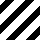
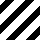

In [4]:
soup

In [5]:
job_elems = soup.find_all('a', class_='linkDiscussion')
base_url = 'https://community.whattoexpect.com/'
base_url + job_elems[0]['href']


'https://community.whattoexpect.com//forums/october-2020-babies/topic/car-seat-safety-with-the-car-seat-lady-dr-alisa-baer-110911560.html'

## Cool, now we can get the hrefs for a given page of a subforum, but how many pages does the subforum have?

In [6]:
page_indicators = soup.find_all('a', class_='page-link')
max_page_value = 0
for page_indicator in page_indicators:
    if len(page_indicator.get_text()) > 0:
        max_page_value = max(int(page_indicator.get_text()), max_page_value)

        print(max_page_value)

2
3
4
5
1562
1562
1562
1562


## Cool beans! Now we can loop through a whole subforum and get all thread URLs: 

In [7]:
# Visit subforum (taken to first page)
base_url = 'https://community.whattoexpect.com/'
URL = 'https://community.whattoexpect.com/forums/october-2020-babies.html'
page = r.get(URL)
soup = BeautifulSoup(page.content, 'lxml')

# Get total number of pages with threads for subforum
page_indicators = soup.find_all('a', class_='page-link')
num_pages = 0
for page_indicator in page_indicators:
    if len(page_indicator.get_text()) > 0:
        num_pages = max(int(page_indicator.get_text()), num_pages)

href_list = []
for pagenum in range(1,max_page_value+1):
    # Set and get the next subforum page
    loop_url = 'https://community.whattoexpect.com/forums/october-2020-babies.html?page=' + str(pagenum)
    page = r.get(URL)
    soup = BeautifulSoup(page.content, 'lxml')
    
    # Find links to all threads on page
    topics = soup.find_all('a', class_='linkDiscussion')
    base_url = 'https://community.whattoexpect.com/'
    #base_url + topics[0]['href']
    for thread in topics:
        full_url = base_url + thread['href']
        href_list.append(full_url)
    

In [8]:
len(href_list)

78100

In [9]:
page = r.get('https://community.whattoexpect.com/forums/october-2020-babies/topic/ive-lost-0-lbs-since-i-left-the-hospital-109617485.html')
soup = BeautifulSoup(page.content, 'lxml')


In [10]:
reply_count = json.loads(soup.find_all('div', class_='discussion-replies__list')[0]['data-config'])['replyCount']
reply_count

58

## So there is a distinction to be made here between replies and comments. Replies seem to be top level comments, of which there are 58 on the thread. There are however a total of 89 comments in the thread, which includes top level comments plus sub-comments. There are a maximum of ten replies per thread page 

In [11]:
int(np.ceil(reply_count/10))

6

In [12]:
soup.find_all('div', class_='discussion-replies__list')[0]['data-config']

'{\r\n            "pageNumber": 1,\r\n            "pageSize": 10,\r\n            "shown": 29,\r\n            "sortOrder":  "asc",\r\n            "totalCount": 89,\r\n            "groupId": "october-2020-babies",\r\n            "topicId": 109617485,\r\n            "topicUid": "ive-lost-0-lbs-since-i-left-the-hospital-109617485",\r\n            "topicMessageId": 109617485,\r\n            "topicAuthor": "nomiswanson",\r\n            "isAuthor": false,\r\n            "isArchiveView": false,\r\n            "isAdmin": false,\r\n            "isBanned": false,\r\n            "userAvatar": "",\r\n            "isLocked": false,\r\n            "replyCount": 58\r\n        }'

In [13]:
soup.find_all('div', class_='wte-reply wte-reply--configurable comment-by-author-993150485')[0]

for result in soup.find_all('div',{'class': re.compile(r"^wte-reply wte-reply--configurable")}):
    print(result)
    print()
    
print(len(soup.find_all('div',{'class': re.compile(r"^wte-reply wte-reply--configurable")})))

<div class="wte-reply wte-reply--configurable comment-by-author-993150485" id="message-109617828"><div class="wte-reply-settings dropdown wte-dropdown"><div aria-expanded="true" aria-haspopup="true" class="wte-icon wte-icon-settings dropdown-toggle wte-dropdown-toggle" data-toggle="dropdown" id="dropdownMenuButton-109617828"></div><div aria-labelledby="dropdownMenuButton-109617828" class="dropdown-menu dropdown-menu-right wte-dropdown-menu"><div class="dropdown-item wte-dropdown-item--inactive wte-dropdown-item __violationReported" style="display:none">Violation Reported<div class="wte-icon wte-icon-reported-check"></div></div><a class="dropdown-item wte-dropdown-item wte-dropdown-item--red __reportInappropriate" data-config='{ "id": 109617828 }' href="#">Report as Inappropriate</a></div></div><div class="wte-reply__body"><div class="wte-reply__author"><img class="wte-reply__author__avatar __lazy-load" data-src="https://images.whattoexpect.com/5e09820f-1ad6-496f-bc86-3532ac501182?width

In [191]:
comments_list = []
url = 'https://community.whattoexpect.com/forums/october-2020-babies/topic/ive-lost-0-lbs-since-i-left-the-hospital-109617485.html'
page = r.get(url)
soup = BeautifulSoup(page.content, 'lxml')
reply_count = json.loads(soup.find_all('div', class_='discussion-replies__list')[0]['data-config'])['replyCount']
no_thread_pages = int(np.ceil(reply_count/10))

## Gets opening post data
OP_name = soup.find('div', class_ = 'discussion-original-post__author__name').get_text() #OP name
OP_test = soup.find('div', class_ = 'discussion-original-post__content').get_text() #OP text
OP_timestamp = int(soup.find('div', class_ = 'discussion-original-post__author__updated')['data-date']) #timestamp OP posted(edited?)
OP_thread_id = int(soup.find('div', class_ = 'discussion-original-post__content')['id'].replace('-',' ').split()[-1]) #thread_id

for thread_page in range(1, no_thread_pages+1):
    if  thread_page > 1:
        page = r.get(url + '?page=' + str(thread_page))

        soup = BeautifulSoup(page.content, 'lxml')
    for comment in soup.find_all('div',{'class': re.compile(r"^wte-reply wte-reply--configurable")}):

        post_info = json.loads(comment.find('div', class_ = 'wte-btn wte-btn-green __replyComment')['data-config'])
        author_name = post_info['authorName']
        comment_id = post_info['id']
        timestamp_posted = int(comment.find('div', class_ = "wte-reply__author__updated")['data-date'])
        comment_text = comment.find('div', class_='wte-reply__content__message __messageContent fr-element fr-view')\
             .get_text()
        top_level = comment.find('span', class_ = 'wte-reply__content__reply-to') is None #Only finds span if reply    

        comments_list.append([author_name, comment_id, timestamp_posted, comment_text, top_level])
        top_level = False
    

In [194]:
len(comments_list)

89

'109617485'

In [101]:
#print(reply_thread.find_all('div',{'class': re.compile(r"^wte-reply wte-reply--configurable")})[0]\
#      .prettify())

## Gets author name
reply_thread.find_all('div',{'class': re.compile(r"^wte-reply wte-reply--configurable")})[0]\
    .find_all('div', class_ = 'wte-reply__author__name')[0].text

## Gets timestamp posted, author name, comment ID
post_info = json.loads(reply_thread.find_all('div',{'class': re.compile(r"^wte-reply wte-reply--configurable")})[0]\
    .find('div', class_ = 'wte-btn wte-btn-green __replyComment')['data-config'])
author_name = post_info['authorName']
comment_id = post_info['id']
timestamp_posted = int(reply_thread.find_all('div',{'class': re.compile(r"^wte-reply wte-reply--configurable")})[0]\
      .find('div', class_ = "wte-reply__author__updated")['data-date'])
   
   # .find_all('div', {'class': re.compile(r"^wte-reply wte-reply--configurable comment-by-author-")})
print(reply_thread.find_all('div',{'class': re.compile(r"^wte-reply wte-reply--configurable")})[0]\
      .prettify())

## TODO:  GET AUTHOR ID
## note: deprioritised because cba, not crucial for analysis
      


<div class="wte-reply wte-reply--configurable comment-by-author-992300489" id="message-109645995">
 <div class="wte-reply-settings dropdown wte-dropdown">
  <div aria-expanded="true" aria-haspopup="true" class="wte-icon wte-icon-settings dropdown-toggle wte-dropdown-toggle" data-toggle="dropdown" id="dropdownMenuButton-109645995">
  </div>
  <div aria-labelledby="dropdownMenuButton-109645995" class="dropdown-menu dropdown-menu-right wte-dropdown-menu">
   <div class="dropdown-item wte-dropdown-item--inactive wte-dropdown-item __violationReported" style="display:none">
    Violation Reported
    <div class="wte-icon wte-icon-reported-check">
    </div>
   </div>
   <a class="dropdown-item wte-dropdown-item wte-dropdown-item--red __reportInappropriate" data-config='{ "id": 109645995 }' href="#">
    Report as Inappropriate
   </a>
  </div>
 </div>
 <div class="wte-reply__body">
  <div class="wte-reply__author">
   <div class="wte-reply__author__avatar-first-letter __color-2">
    F
   </

In [105]:
for comment in comments_list:
    print(comment)
    print()

SyntaxError: unexpected EOF while parsing (<ipython-input-105-f130636693f5>, line 3)

In [119]:
for gotte in reply_thread:
    print(gotte)
    post_info = json.loads(gotte.find('div', class_ = 'wte-btn wte-btn-green __replyComment')['data-config'])
    author_name = post_info['authorName']
    comment_id = post_info['id']
    timestamp_posted = int(gotte.find('div', class_ = "wte-reply__author__updated")['data-date'])
    comment_body = gotte.find('div', class_='wte-reply__content__message __messageContent fr-element fr-view')\
         .get_text()
    print('author name: ' + author_name)
    print('comment_id: ' + str(comment_id))
    print('timestamp_posted: ' + str(timestamp_posted))
    print('body: ' + gotte.find('div', class_='wte-reply__content__message __messageContent fr-element fr-view')\
         .get_text())
    print()

<div class="wte-reply wte-reply--configurable comment-by-author-992300489" id="message-109645995"><div class="wte-reply-settings dropdown wte-dropdown"><div aria-expanded="true" aria-haspopup="true" class="wte-icon wte-icon-settings dropdown-toggle wte-dropdown-toggle" data-toggle="dropdown" id="dropdownMenuButton-109645995"></div><div aria-labelledby="dropdownMenuButton-109645995" class="dropdown-menu dropdown-menu-right wte-dropdown-menu"><div class="dropdown-item wte-dropdown-item--inactive wte-dropdown-item __violationReported" style="display:none">Violation Reported<div class="wte-icon wte-icon-reported-check"></div></div><a class="dropdown-item wte-dropdown-item wte-dropdown-item--red __reportInappropriate" data-config='{ "id": 109645995 }' href="#">Report as Inappropriate</a></div></div><div class="wte-reply__body"><div class="wte-reply__author"><div class="wte-reply__author__avatar-first-letter __color-2">F</div><section class="wte-reply__author__info"><div class="wte-reply__au

In [185]:
 comments_list = []
for comment in soup.find_all('div',{'class': re.compile(r"^wte-reply wte-reply--configurable")}):
    if comment['class'][0] == 'discussion-replies__list__item__show-more':
        continue
    post_info = json.loads(comment.find('div', class_ = 'wte-btn wte-btn-green __replyComment')['data-config'])
    author_name = post_info['authorName']
    comment_id = post_info['id']
    timestamp_posted = int(comment.find('div', class_ = "wte-reply__author__updated")['data-date'])
    comment_text = comment.find('div', class_='wte-reply__content__message __messageContent fr-element fr-view')\
         .get_text()
    top_level = comment.find('span', class_ = 'wte-reply__content__reply-to') is None #Only finds span if reply    

    comments_list.append([author_name, comment_id, timestamp_posted, comment_text, top_level])
    top_level = False
    
len(comments_list)

29

In [184]:
soup.find_all('div',{'class': re.compile(r"^wte-reply wte-reply--configurable")})[27]\
     .find('span', class_ = 'wte-reply__content__reply-to') is None

True

In [186]:
comments_list

[['heebiejeebies',
  109617828,
  1612911029000,
  'I was 200 lbs the day I gave birth and 190 when I went home, I got down to 180 after like 2 weeks so I thought the rest would come off so fast and haven’t lost a single pound since. I have no advice but i’m in the same boat',
  True],
 ['nomiswanson',
  109618227,
  1612911460000,
  'it’s so frustrating 😣😭 especially when you hear stories like “I ate like a wildebeest while I was breastfeeding and the weight just melted right off!!”',
  False],
 ['JillianFadun',
  109688321,
  1613005202000,
  "Exact same boat here! I've even been working out, eating clean and everything! So annoying... almost 4 months PP",
  False],
 ['chels2020',
  109618836,
  1612912228000,
  "I have a friend who gained a ton of weight after, because her feelings of being ravenous made her eat so much. I think breast feeding also makes you retain more fluid as well. I still can't wear my wedding rings :( but I've also made no effort to eat healthier or work out so